* MODELS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from lightgbm import (
    LGBMRegressor, 
    LGBMClassifier
)
from sklearn.ensemble import (
    RandomForestRegressor, 
    RandomForestClassifier
)
from sklearn.linear_model import (
    LinearRegression, 
    LogisticRegression, 
    Lasso, 
    Ridge
)
from sklearn.model_selection import (
    KFold, 
    GridSearchCV, 
    train_test_split, 
    cross_val_score
)
from sklearn.metrics import (
    mean_squared_error, 
    make_scorer, 
    mean_squared_log_error, 
    accuracy_score, 
    precision_recall_curve,
    PrecisionRecallDisplay,
    auc
)
from sklearn.neighbors import (
    KNeighborsRegressor, 
    KNeighborsClassifier
)
from sklearn.pipeline import (
    Pipeline
)
from sklearn.preprocessing import (
    FunctionTransformer, 
    StandardScaler
)
from sklearn.svm import (
    SVR, 
    SVC
)



In [70]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

* CLASIFICATION
1. Regresión logística
2. Support Vector Machine (SVM)
3. Random Forest
4. LGBM o XGBoost 
5. Knn

* Metrics
    - accuracy
    - pression
    - recall
    - F1-score
    - auc de roc curve


In [72]:
df.shape[0]*0.8

4088.0

In [4]:
df = pd.read_csv('data/data_numbers_dummis.csv')

X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_test.value_counts(normalize=True) * 100

0    95.112016
1     4.887984
Name: stroke, dtype: float64

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 892
[LightGBM] [Info] Number of data points in the train set: 3436, number of used features: 18
[LightGBM] [Info] Start training from score 0.039872
AUC Logistic Regression: 0.14310529652506593
AUC Random Forest: 0.17824448062393627
AUC LGBM: 0.1605837361180624


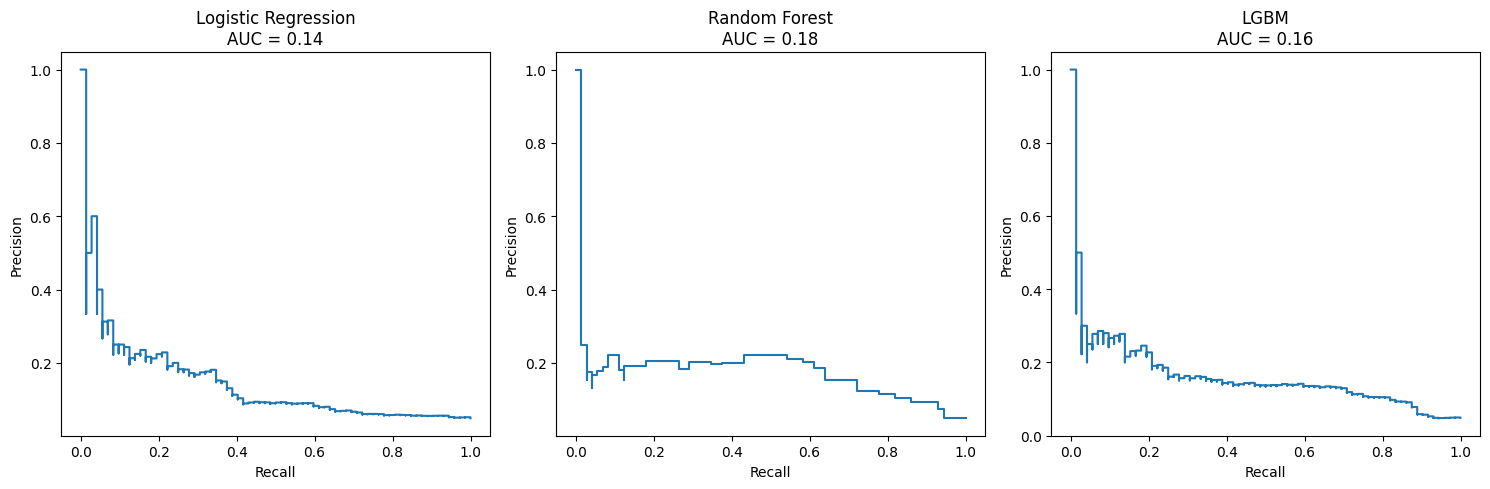

In [5]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred_logistic = logistic.predict_proba(X_test)[:,1]
precision_logistic, recall_logistic, _ = precision_recall_curve(y_test, y_pred_logistic)

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train.values.ravel())
y_pred_random_forest = random_forest.predict_proba(X_test)[:,1]
precision_random_forest, recall_random_forest, _ = precision_recall_curve(y_test, y_pred_random_forest)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
precision_lgbm, recall_lgbm, _ = precision_recall_curve(y_test, y_pred_lgbm)

### Calcular el área bajo la curva (AUC) para cada modelo
auc_logistic = auc(recall_logistic, precision_logistic)
auc_random_forest = auc(recall_random_forest, precision_random_forest)
auc_lgbm = auc(recall_lgbm, precision_lgbm)

print('AUC Logistic Regression:', auc_logistic)
print('AUC Random Forest:', auc_random_forest)
print('AUC LGBM:', auc_lgbm)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Logistic Regression
disp_logistic = PrecisionRecallDisplay(precision=precision_logistic, recall=recall_logistic)
disp_logistic.plot(ax=axes[0])
axes[0].set_title('Logistic Regression\nAUC = {:.2f}'.format(auc_logistic))
# Random Forest
disp_random_forest = PrecisionRecallDisplay(precision=precision_random_forest, recall=recall_random_forest)
disp_random_forest.plot(ax=axes[1])
axes[1].set_title('Random Forest\nAUC = {:.2f}'.format(auc_random_forest))
# LGBM
disp_lgbm = PrecisionRecallDisplay(precision=precision_lgbm, recall=recall_lgbm)
disp_lgbm.plot(ax=axes[2])
axes[2].set_title('LGBM\nAUC = {:.2f}'.format(auc_lgbm))

plt.tight_layout()
plt.show()

La interpretación de un gráfico de precisión y recall depende del contexto del problema que estás abordando. Sin embargo, en general, aquí hay algunas pautas sobre cómo interpretar este tipo de gráfico:

Curva de Precisión y Recall: La curva en sí muestra cómo varía la precisión (la proporción de positivos predichos correctamente entre todos los positivos predichos) a medida que cambia el recall (la proporción de positivos reales que se identifican correctamente).

Área Bajo la Curva (AUC-PR): Una métrica común para resumir el rendimiento general del modelo en términos de precisión y recall es el Área Bajo la Curva (AUC) de la curva de precisión y recall. Cuanto más cerca esté este valor de 1, mejor será el rendimiento del modelo.

Puntos en la Curva: La interpretación de puntos específicos en la curva puede ser útil para ajustar el umbral de decisión del clasificador. Por ejemplo, si estás más interesado en la precisión o en el recall, puedes ajustar el umbral de forma que optimice la métrica que consideres más importante para tu aplicación específica.

Trade-off entre Precisión y Recall: En general, hay un trade-off entre precisión y recall. A menudo, aumentar uno puede implicar la disminución del otro. Esto se puede visualizar observando cómo cambian los valores de precisión y recall a lo largo de la curva.

Comparación entre Modelos: Si tienes múltiples curvas en el mismo gráfico, puedes comparar el rendimiento de diferentes modelos. Cuanto más cerca estén las curvas del vértice superior derecho del gráfico (donde tanto la precisión como el recall son 1), mejor será el rendimiento del modelo.

En resumen, al interpretar un gráfico de precisión y recall, busca un alto valor de AUC-PR, considere el trade-off entre precisión y recall, y compara las curvas entre diferentes modelos para determinar cuál funciona mejor para tus necesidades específicas.